In [1]:
import torch 
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [2]:
raw_data="""There is no better teacher in life than failure. Failure brings the opportunity to learn things better.
It helps us in learning from our mistakes. Failures make us rethink and reconsider to find new ways and strategies to achieve our goals. 
Failure helps us in gaining deeper experience and better knowledge that widens our ways of growth. It plants deep value within us so that 
we can better understand life and the world around us. Every ‘failed attempt’ simply becomes a new learning experience to fine-tune our efforts. 
Failure is, in fact, the most valuable experience that teaches us new things. Failures makes us realize the importance of success"""
raw_data=raw_data.split()
# raw_data={" ".join(raw_data)}
# raw_data=str(raw_data)
# raw_data=raw_data.split()
# raw_data=raw_data.split()


#context word window size
context_words=2 #2 to the left and 2 to the right

#no of hidden layers or length of embeddings(since both are equivalent)
n=100

#removing the duplicate elements from the data
vocab=set(raw_data)
vocab_size=len(vocab)
index=list(range(0,len(vocab)))

# word_to_ix = {word:ix for ix, word in enumerate(vocab)}
# ix_to_word = {ix:word for ix, word in enumerate(vocab)}
# print(word_to_ix)
#dict_words for converting index:word
dict_words=dict(zip(index,vocab))
dict_keys=list(dict_words.keys())
# type(dict_keys)
#dict_index for converting word:index
dict_index=dict(zip(vocab,index))
dict_index_k=list(dict_index.keys())
print(dict_index)

{'simply': 0, 'from': 1, 'knowledge': 2, 'find': 3, 'Failures': 4, 'attempt’': 5, 'learning': 6, 'achieve': 7, 'It': 8, 'new': 9, 'strategies': 10, 'most': 11, 'make': 12, 'widens': 13, 'the': 14, 'us': 15, 'learn': 16, 'brings': 17, 'experience': 18, 'can': 19, 'things.': 20, 'better': 21, 'so': 22, 'than': 23, 'to': 24, 'Every': 25, 'helps': 26, 'becomes': 27, 'valuable': 28, 'goals.': 29, 'realize': 30, 'our': 31, 'better.': 32, 'There': 33, 'deeper': 34, 'understand': 35, 'no': 36, 'Failure': 37, 'of': 38, 'mistakes.': 39, 'efforts.': 40, 'teacher': 41, '‘failed': 42, 'plants': 43, 'ways': 44, 'gaining': 45, 'reconsider': 46, 'rethink': 47, 'world': 48, 'a': 49, 'deep': 50, 'value': 51, 'that': 52, 'importance': 53, 'success': 54, 'is,': 55, 'teaches': 56, 'and': 57, 'is': 58, 'things': 59, 'failure.': 60, 'opportunity': 61, 'fact,': 62, 'growth.': 63, 'makes': 64, 'around': 65, 'we': 66, 'us.': 67, 'life': 68, 'fine-tune': 69, 'in': 70, 'within': 71}


In [3]:
data = []
for i in range(2, len(raw_data) - 2):
    context = [raw_data[i - 2], raw_data[i - 1],
               raw_data[i + 1], raw_data[i + 2]]
    target = raw_data[i]
    data.append((context, target))

print(data)

[(['There', 'is', 'better', 'teacher'], 'no'), (['is', 'no', 'teacher', 'in'], 'better'), (['no', 'better', 'in', 'life'], 'teacher'), (['better', 'teacher', 'life', 'than'], 'in'), (['teacher', 'in', 'than', 'failure.'], 'life'), (['in', 'life', 'failure.', 'Failure'], 'than'), (['life', 'than', 'Failure', 'brings'], 'failure.'), (['than', 'failure.', 'brings', 'the'], 'Failure'), (['failure.', 'Failure', 'the', 'opportunity'], 'brings'), (['Failure', 'brings', 'opportunity', 'to'], 'the'), (['brings', 'the', 'to', 'learn'], 'opportunity'), (['the', 'opportunity', 'learn', 'things'], 'to'), (['opportunity', 'to', 'things', 'better.'], 'learn'), (['to', 'learn', 'better.', 'It'], 'things'), (['learn', 'things', 'It', 'helps'], 'better.'), (['things', 'better.', 'helps', 'us'], 'It'), (['better.', 'It', 'us', 'in'], 'helps'), (['It', 'helps', 'in', 'learning'], 'us'), (['helps', 'us', 'learning', 'from'], 'in'), (['us', 'in', 'from', 'our'], 'learning'), (['in', 'learning', 'our', 'mist

In [4]:
print(len(raw_data))
print(vocab)
print(dict_words)
print(vocab_size)

109
{'simply', 'from', 'knowledge', 'find', 'Failures', 'attempt’', 'learning', 'achieve', 'It', 'new', 'strategies', 'most', 'make', 'widens', 'the', 'us', 'learn', 'brings', 'experience', 'can', 'things.', 'better', 'so', 'than', 'to', 'Every', 'helps', 'becomes', 'valuable', 'goals.', 'realize', 'our', 'better.', 'There', 'deeper', 'understand', 'no', 'Failure', 'of', 'mistakes.', 'efforts.', 'teacher', '‘failed', 'plants', 'ways', 'gaining', 'reconsider', 'rethink', 'world', 'a', 'deep', 'value', 'that', 'importance', 'success', 'is,', 'teaches', 'and', 'is', 'things', 'failure.', 'opportunity', 'fact,', 'growth.', 'makes', 'around', 'we', 'us.', 'life', 'fine-tune', 'in', 'within'}
{0: 'simply', 1: 'from', 2: 'knowledge', 3: 'find', 4: 'Failures', 5: 'attempt’', 6: 'learning', 7: 'achieve', 8: 'It', 9: 'new', 10: 'strategies', 11: 'most', 12: 'make', 13: 'widens', 14: 'the', 15: 'us', 16: 'learn', 17: 'brings', 18: 'experience', 19: 'can', 20: 'things.', 21: 'better', 22: 'so', 23

In [5]:
one_hot_data=[]
target_label=[]
for i in range(2,len(raw_data)-2):
  # one_hot_context=[one_hot[dict_index[raw_data[i - 2]]],one_hot[dict_index[raw_data[i - 1]]],
  #                  one_hot[dict_index[raw_data[i + 1]]],one_hot[dict_index[raw_data[i + 2]]]]
  one_hot_context=np.zeros(vocab_size)
  one_hot_context[dict_index[raw_data[i-2]]]=1
  one_hot_context[dict_index[raw_data[i-1]]]=1
  one_hot_context[dict_index[raw_data[i+2]]]=1
  one_hot_context[dict_index[raw_data[i+1]]]=1
  one_hot_target=np.zeros(vocab_size)
  one_hot_target[dict_index[raw_data[i]]]=1
  target=dict_index[raw_data[i]]
  target=torch.tensor(target)
  target_label.append(target)
  one_hot_data.append((one_hot_context,one_hot_target))
# print(one_hot_data)

In [6]:
class CBOW(nn.Module):
  def __init__(self,vocab_size,em_size):
    super(CBOW,self).__init__()

    self.linear1=nn.Linear(vocab_size,em_size)
    self.activation_fun=nn.ReLU()
    self.linear2=nn.Linear(em_size,vocab_size)
    self.act_fun=nn.LogSoftmax(dim=-1)


  def forward(self,input):
    out=self.linear1(input)
    # print("input= ")
    # for i in input:
    #   print(dict_words[torch.argmax(i).item()])
    # print(dict_words[torch.argmax(input).item()])
    out=self.activation_fun(out)
    out=self.linear2(out)
    out=self.act_fun(out)
    # print("output= ")
    # print(dict_words[torch.argmax(out).item()])
    return out.float()

In [7]:
#Training
model=CBOW(vocab_size,n)
loss_fun = nn.NLLLoss()
Loss=[]
# acc=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
raw_data_word={}
for epoch in range(100):
    total_loss=0

    for l, (context,target) in enumerate(one_hot_data):
      context=torch.Tensor(context)
      context=context.view(1,-1)
    # print("epoch ", epoch)
    # print("Context= ",context.shape)
      target=torch.Tensor(target)
      target=target.view(1,-1)
    # print("target= ",target[0].shape)
      log_probs=model(context)
      # predicted=torch.max(log_probs.data)


    # print("Log_probs= ",log_probs.shape)
    # log_probs=torch.Tensor(log_probs)
      log_probs=log_probs.view(target.size(0),-1)
    # print("Log_probs= ",log_probs[0].shape)
    # print(log_probs[0].shape)
    # print("type log_pros= ",type(log_probs))
    # print("type target= ",type(target))
    # print(log_probs[0])
    # print(target[0])
      total_loss+=loss_fun(log_probs[0],target[0].long())
      
    
    Loss.append(float(total_loss))
  # print("loss= ",total_loss)
    optimizer.zero_grad()
  # print("op")
    total_loss.backward()
  # print("back")
    optimizer.step()
  # print("step")

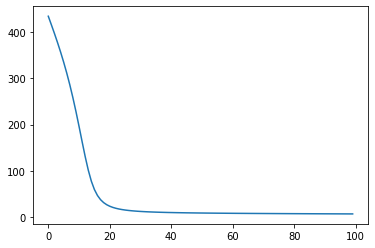

In [8]:
import matplotlib.pyplot as plt
plt.plot(Loss)
plt.show()

In [9]:

print(dict_index)
context1=np.zeros(vocab_size)
context1=np.array(context1)
context1=torch.tensor(context1)
context1[dict_index['Failures']]=1
context2=np.zeros(vocab_size)
context2=np.array(context2)
context2=torch.tensor(context2)
context2[dict_index['Failures']]=1
a=model(context1.float())
b=model(context2.float())
a=torch.tensor(a)
b=torch.tensor(b)
ang=np.arccos(np.clip(np.dot(a, b),-1.0,1.0))
# deg=ang*180/(np.pi)
# print(ang)

{'simply': 0, 'from': 1, 'knowledge': 2, 'find': 3, 'Failures': 4, 'attempt’': 5, 'learning': 6, 'achieve': 7, 'It': 8, 'new': 9, 'strategies': 10, 'most': 11, 'make': 12, 'widens': 13, 'the': 14, 'us': 15, 'learn': 16, 'brings': 17, 'experience': 18, 'can': 19, 'things.': 20, 'better': 21, 'so': 22, 'than': 23, 'to': 24, 'Every': 25, 'helps': 26, 'becomes': 27, 'valuable': 28, 'goals.': 29, 'realize': 30, 'our': 31, 'better.': 32, 'There': 33, 'deeper': 34, 'understand': 35, 'no': 36, 'Failure': 37, 'of': 38, 'mistakes.': 39, 'efforts.': 40, 'teacher': 41, '‘failed': 42, 'plants': 43, 'ways': 44, 'gaining': 45, 'reconsider': 46, 'rethink': 47, 'world': 48, 'a': 49, 'deep': 50, 'value': 51, 'that': 52, 'importance': 53, 'success': 54, 'is,': 55, 'teaches': 56, 'and': 57, 'is': 58, 'things': 59, 'failure.': 60, 'opportunity': 61, 'fact,': 62, 'growth.': 63, 'makes': 64, 'around': 65, 'we': 66, 'us.': 67, 'life': 68, 'fine-tune': 69, 'in': 70, 'within': 71}


<ipython-input-9-2df8eef0320f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a=torch.tensor(a)
<ipython-input-9-2df8eef0320f>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b=torch.tensor(b)


In [10]:
print(ang)

0.0
